In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

In [3]:
from datetime import datetime
import yfinance as yf
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [4]:
tech_list = ['HDB']   #, 'RELIANCE.NS', 'TCS.NS', 'SBIN.NS']
end = datetime.now()
start = "2006-12-29"
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

stk_list = [HDB]
com_name = ["HDFC"]

for comp, c_name in zip(stk_list, com_name):
    comp["company_name"] = c_name

df = pd.concat(stk_list, axis=0)

[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2006-12-29,7.650,7.656,7.511,7.548,6.753229,1686000,HDFC
2007-01-03,7.700,7.704,7.456,7.493,6.704020,2278000,HDFC
2007-01-04,7.490,7.534,7.389,7.479,6.691494,2269000,HDFC
2007-01-05,7.500,7.500,7.273,7.321,6.550131,1718000,HDFC
2007-01-08,7.272,7.353,7.203,7.260,6.495554,2070000,HDFC


In [6]:
data = pd.DataFrame()
data.index = df.index
data["Close"] = df["Close"]

In [7]:
data.head()

,Close
Date,
2006-12-29,7.548
2007-01-03,7.493
2007-01-04,7.479
2007-01-05,7.321
2007-01-08,7.260


In [8]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_test = adfuller(data["Close"])
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')


ADF Statistic: -1.090189567776715
p-value: 0.7189682933408308


In [9]:
# First difference
diff = data["Close"].diff().dropna()

# You may need to apply further differencing if the series is still non-stationary
# diff = diff.diff().dropna()


In [10]:
len(diff)

4259

In [11]:
data["Close"]

Date
2006-12-29     7.548000
2007-01-03     7.493000
2007-01-04     7.479000
2007-01-05     7.321000
2007-01-08     7.260000
                ...    
2023-11-27    58.889999
2023-11-28    59.349998
2023-11-29    60.549999
2023-11-30    60.040001
2023-12-01    60.709999
Name: Close, Length: 4260, dtype: float64

In [12]:
diff

Date
2007-01-03   -0.055000
2007-01-04   -0.014000
2007-01-05   -0.158000
2007-01-08   -0.061000
2007-01-09   -0.103000
                ...   
2023-11-27   -0.610001
2023-11-28    0.459999
2023-11-29    1.200001
2023-11-30   -0.509998
2023-12-01    0.669998
Name: Close, Length: 4259, dtype: float64

In [13]:
adf_test = adfuller(diff)
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')


ADF Statistic: -11.608754763120999
p-value: 2.543168361475558e-21


In [14]:
stepwise_fit = auto_arima(data["Close"], start_p=1, start_q=1, max_p=3, max_q=3,
                          seasonal=False, d=None, trace=True,
                          error_action='ignore', suppress_warnings=True,
                          stepwise=True)
print(stepwise_fit.summary())


Performing stepwise search to minimize aic


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9448.301, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9449.509, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9446.323, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9446.354, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9448.742, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=9448.299, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9450.298, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=9445.644, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=9447.614, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=9447.617, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=9445.678, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=9449.613, Time=0.15 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.889 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observat

In [15]:
train_size = int(len(data["Close"]) * 0.8)
train, test = data["Close"][:train_size], data["Close"][train_size:]


In [16]:
model = ARIMA(train, order=stepwise_fit.order)
model_fit = model.fit()


C:\Users\sunan\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sunan\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sunan\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [17]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')

C:\Users\sunan\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\sunan\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\sunan\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [18]:
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'RMSE: {rmse}')


RMSE: 20.51007468005706


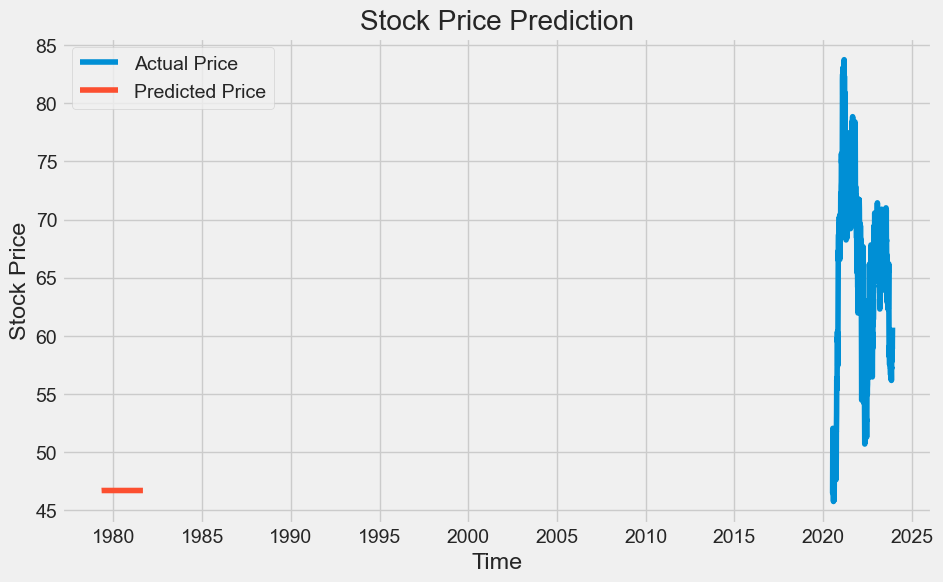

In [19]:
plt.figure(figsize=(10, 6))
#plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [20]:
next5 = model_fit.forecast(steps=5)

C:\Users\sunan\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\sunan\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [21]:
next5

3408    46.703629
3409    46.705247
3410    46.705147
3411    46.705154
3412    46.705153
Name: predicted_mean, dtype: float64